# Numerical ODE

## Stiffness

Informally, a stiff ODE (system) is an ODE (system) whose solution has derivatives vary in magnitude.

Typical examples: $y' = -20 y, \; y(0) = 1$ on $[0, 1]$, solution $y = e^{-20 t}$. Derivative $|y'| \in (0, 20]$.

Stiffness could cause several troubles to numerical solutions.

In [1]:
using PyPlot

function euler(f, y0, h, N, t0=0.0)
    t = t0 .+ h*(0:N)
    y = zeros(length(y0), N+1)
    
    y[:,1] .= y0
    for n = 1:N
        y[:,n+1] = y[:,n] + h * f(t[n], y[:,n])
    end
    
    return t,y
end

function rk4(f, y0, h, N, t0=0)
    t = t0 .+ h*(0:N)
    y = zeros(length(y0), N+1)
    
    y[:,1] .= y0
    for n = 1:N
        k1 = h * f(t[n], y[:,n])
        k2 = h * f(t[n] + h/2, y[:,n] + k1/2)
        k3 = h * f(t[n] + h/2, y[:,n] + k2/2)
        k4 = h * f(t[n] + h, y[:,n] + k3)
        y[:,n+1] = y[:,n] + (k1 + 2k2 + 2k3 + k4) / 6
    end
    
    return t,y
end

rk4 (generic function with 2 methods)

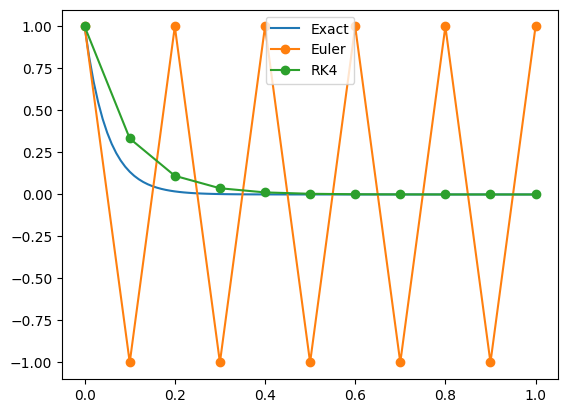

Euler Error: 1.1353352832366128
RK4 Error: 0.19799805009672067


In [43]:
## change a and h, what do you see?

a = 0    # lower bound
b = 1    # upper bound
f(t,y) = -20*y    # RHS of ODE y'(t) = f(t, y)

# exact solution
yexact(t) = exp(-20*t)
y_init = yexact(a)

tt = a:0.01:b
plot(tt, yexact.(tt))

h = 0.1

# Euler
t,y = euler(f, y_init, h, round(Int, (b-a)/h), a)
println("Euler Error: ", maximum(abs.(y[:] - yexact.(t))))
plot(t, y[:], "-o")

# Runge-Kutta
t,y = rk4(f, y_init, h, round(Int, (b-a)/h), a)
println("RK4 Error: ", maximum(abs.(y[:] - yexact.(t))))
plot(t, y[:], "-o")

# legend(("Exact", "Numerical"));
legend(("Exact", "Euler", "RK4"));

- How do I know whether an ODE (system) is stiff?  
Observe. For rigorous ways, see Math128A or [LeVeque](https://faculty.washington.edu/rjl/fdmbook/).
- How to handle stiff ODEs?  
Need to take a course if you really want to master it. For non-advanced usage, you may pass a hint `alg_hints=[:stiff]` to the `DifferentialEquations` solver when solving stiff problems. See [here](https://diffeq.sciml.ai/stable/tutorials/ode_example/#Choosing-a-Solver-Algorithm).

## Convert high order ODE to system of ODEs

To solve a high order ODE with either your own code or `DifferentialEquations`, you need to convert it to a system of ODEs. How to do it?

![title](https://github.com/yixiangLuo/math124/notebooks/7_highODE.png)